In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

It has 5 columns as mentioned above

In [3]:
digits.images.shape

(1797, 8, 8)

In the images column, containing 1797 images of having intensities 8*8 each

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In the data column, containing flatten version of 8*8=64 columns with 1794 rows

In [5]:
x = digits.data
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(data = y, columns=['targets'])
df

Lets look at the first image, which is an 8*8 array of pixel intensities 

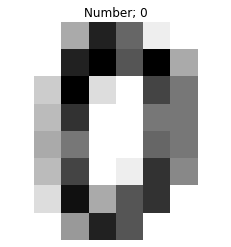

In [8]:
digit = digits.images[0]
plt.imshow(digit, cmap=plt.cm.gray_r)
plt.axis("off")
plt.title('Number; ' + str(y[0]))
None

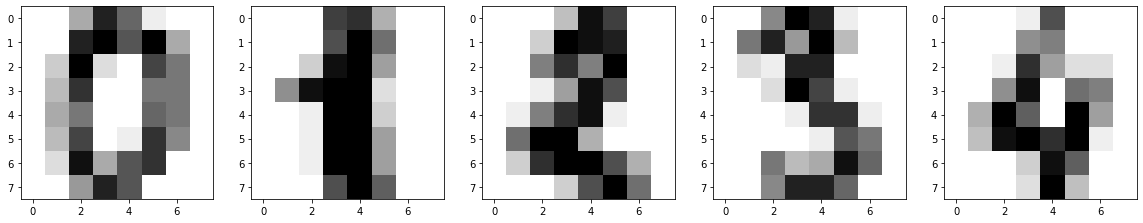

In [9]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r,interpolation='nearest')

Split the data into training and testing sets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=99, stratify = y )

In [11]:
x_train.shape
x_test.shape

(594, 64)

Fit the model

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Make prediction in the test dataset

In [13]:
y_pred = knn.predict(x_test[0:10])
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5])

To check wheather it correctly predicts 

In [14]:
y_test[0:10]

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5])

In [16]:
y_pred = knn.predict(x_test)

In [ ]:
#y_pred

Evaluate the results by generating a classification report which calculates
various performance measures

In [17]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        60
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        59
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



Evaluate the results by looking at the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 58]], dtype=int64)

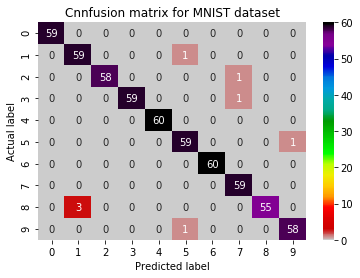

In [19]:
s = sns.heatmap(conf_mat, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Cnnfusion matrix for MNIST dataset')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
None

Getting specific performance measures

In [20]:
# Calculate the overall accuracy using knn.score
acc = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy = {acc:.4}')

accuracy = 0.9865
